# Revenue Optimization: Predictive Modeling in Ecommerce 💡📊

## Problem Statement
A project with an Ecommerce company sells clothing online but they also have in-store style
and clothing advice sessions. Customers come in to the store, have sessions/meetings with
a personal stylist, then they can go home and order either on a mobile app or website for the
clothes they want. The company is trying to decide whether to focus their efforts on their
mobile app experience or their website. They have asked to help them figure it out.


## Objective 🎯
The objective of this data science project is twofold:
1. **Build Predictive Model**: Develop a robust predictive model capable of forecasting revenue in an ecommerce environment.
2. **Identify Key Dimension**: Determine which dimension contributes more to revenue between time spent on the website ⏳ and time spent on the app 📱, guiding stakeholders on where to focus their optimization efforts.


In [1]:
# For Mathematical Operation
import numpy as np 
import math 

import pandas as pd # to work with datasets

# For Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# For machine learning and statistics
from scipy import stats

In [2]:
# importing given datasets
data = pd.read_csv(r'customer_dataset.csv')

# 1. Information on Dataset

In [3]:
# basic info on given data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**1.1 Inference:**

From the above data, we can infer the following:

    1. Rows & Column:  
              ->   8 column/variable 
              -> 500 row/data points
        
    2. Data Classification:
              -> 3 categorical variable 
              -> 5 Continuous variable
              
    3. No null value
    
    4.'y'(target variable) -> Yearly Amount Spent (based on problem statement)
    
    5. given what we are predticting, email and avatar variable are irrelevant 
    
    6. Since it's ecommerce company, Address will have no impact. 
    
    7. No inconsistent data entries
    

# 2. Exploratory Data Analysis

In [4]:
def univariate_analysis(data1):
    # statistics data 
    print('\033[1m Statistical Info:\033[0m')
    print(data1.describe())
    print('median: ',np.median(data1))
    total_rows =2
    axes_per_row = 3
    # Creating subplots
    fig, axes = plt.subplots(total_rows,axes_per_row,figsize = (14,7))

    #  convert multi-dimension to single dimension
    ax = axes.flatten()
    
    
    #histogram
    bins = int(np.sqrt(len(data1)))
    skewness = (3*(np.mean(data1)-np.median(data1)))/np.std(data1)
    ax[0].hist(data1, bins )
    ax[0].set_title('Histogram' )
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Density')
    print('Bins: ', bins)
    print('Skewness: ',skewness)
    print('Kurtosis: ',stats.kurtosis(data1))

    # Density plot
    sns.kdeplot(data1,ax = ax[1], color = 'green', fill= True)
    ax[1].set_title('Density Plot' )
    ax[1].set_xlabel('Value')
    ax[1].set_ylabel('Density')

    # Plot CumulativeKDE plot
    sns.kdeplot(data1, ax = ax[2],  color='purple', cumulative=True)
    ax[2].set_xlabel('Value')
    ax[2].set_ylabel('Density')
    ax[2].set_title('Cummulative Kernel Density Estimation (KDE)')

    # boxplot
    ax[3].boxplot(data1)
    ax[3].set_xlabel('Avg Session Length')
    ax[3].set_ylabel('Value')
    ax[3].set_title('Boxplot')

    # Quantile-Quantile Plot(Q-Q Plot)
    stats.probplot(data1, dist = 'norm',plot = ax[4])
    ax[4].set_title('Q-Q plot')

    plt.suptitle(data1.name, size = 15)
    fig.delaxes(ax[5])
    plt.tight_layout(pad=1.5)
    plt.show()

**2.1. Avg Session Length**

 Statistical Info:
count    500.000000
mean      33.053194
std        0.992563
min       29.532429
25%       32.341822
50%       33.082008
75%       33.711985
max       36.139662
Name: Avg Session Length, dtype: float64
median:  33.08200760262899
Bins:  22
Skewness:  -0.08717715222866186
Kurtosis:  -0.0002327046425132373


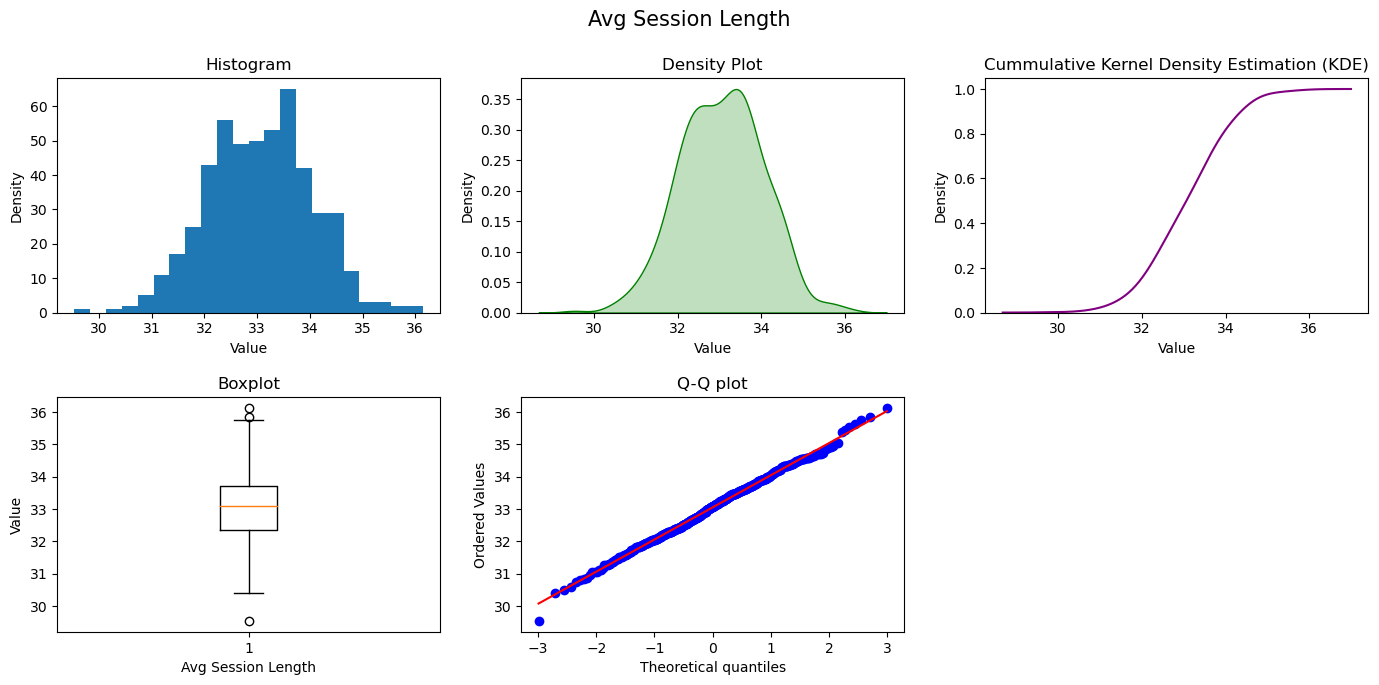

In [5]:
univariate_analysis(data.iloc[:,3])

**2.1.1.Inference on Avg. Session Lenght**
 
From the above plots/axes, we infer the following:

    1.it follows normal distribution (ref. histogram plot, density plot, Cummulative kde and Qunatile-Quantile plot)
                
    2.The distribution exhibited a slight negative skewness (ref. Histogram plot)
                
    3.By taking account of mean and median value and comparing it with Cummulative Kde, we confirms normal distribution
                (ref. Cumulative kde)
                
    4.There are more outlier on right tail compared to left tail(ref. histogram and boxplot)

**2.2.Time on App**

 Statistical Info:
count    500.000000
mean      12.052488
std        0.994216
min        8.508152
25%       11.388153
50%       11.983231
75%       12.753850
max       15.126994
Name: Time on App, dtype: float64
median:  11.983231258825267
Bins:  22
Skewness:  0.20918814335708658
Kurtosis:  0.11185784752967809


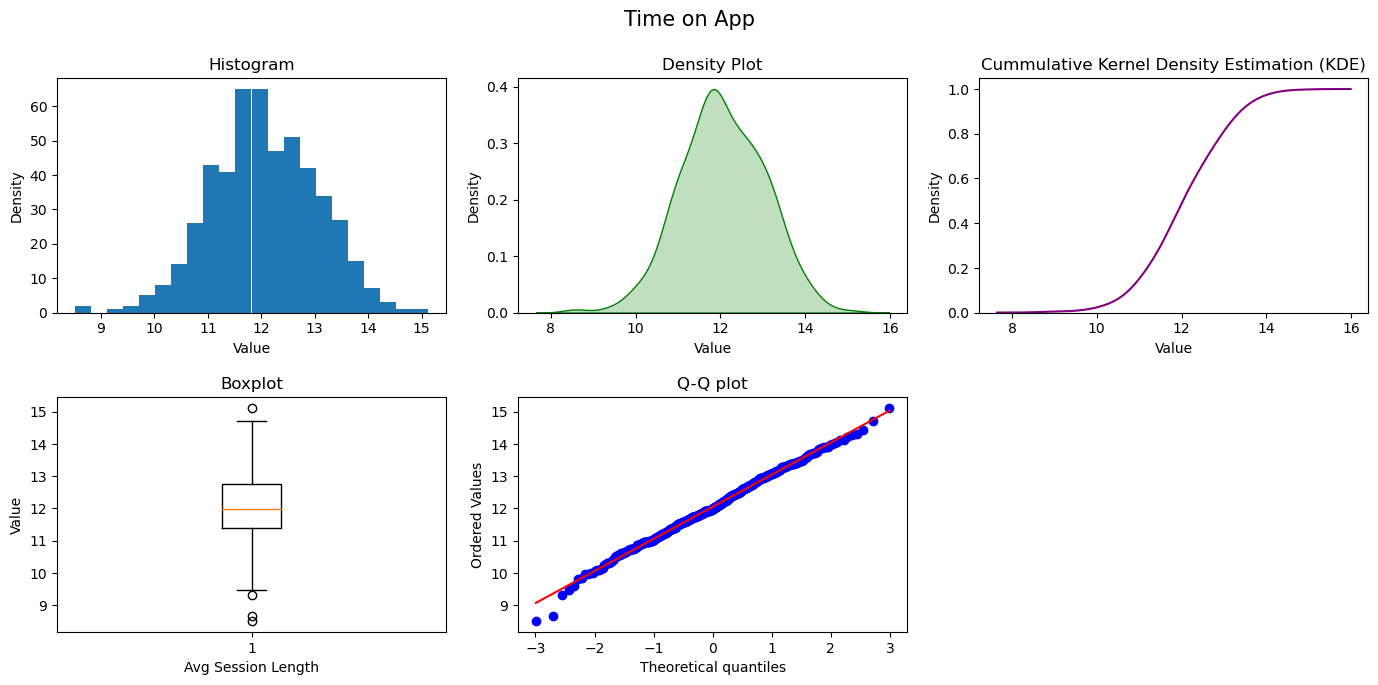

In [6]:
univariate_analysis(data.iloc[:,4])

**2.2.1.Inference on Time on App**
 
From the above plots/axes, we infer the following:

    1.it follows normal distribution (ref. histogram plot, density plot, Cummulative kde and Qunatile-Quantile plot)
                
    2.The distribution exhibited a slight postive skewness(0.2) but it is relatively small (ref. Histogram plot and density plot)
    
    3.The distribution exhibited a slight postive kurtosis(0.1) but it is relatively small(ref. Histogram and density plot)
                
    4.By taking account of mean and median value and comparing it with Cummulative Kde, we confirms normal distribution
    (ref. Cumulative kde)
                
    5.There are more outlier on left tail compared to right tail since it is postively skewed(ref. histogram and boxplot)

**2.3.Time on Website**

 Statistical Info:
count    500.000000
mean      37.060445
std        1.010489
min       33.913847
25%       36.349257
50%       37.069367
75%       37.716432
max       40.005182
Name: Time on Website, dtype: float64
median:  37.069366582835826
Bins:  22
Skewness:  -0.026512205310242547
Kurtosis:  -0.10928282662789668


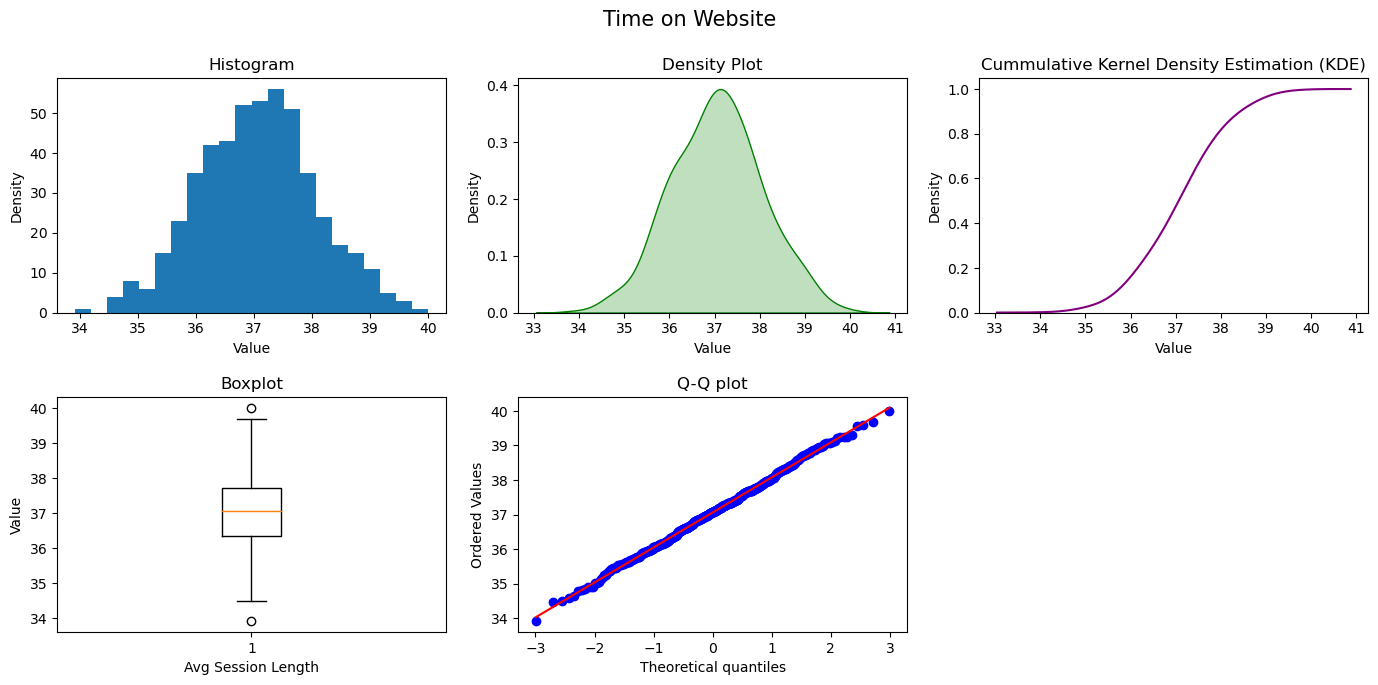

In [7]:
univariate_analysis(data.iloc[:,5])

**2.3.1.Inference on Time on Website**
  
From the above plots/axes, we infer the following:

    1.it follows normal distribution (ref. histogram plot, density plot, Cummulative kde and Qunatile-Quantile plot)
    
    2.The distribution exhibited a slight negative kurtosis(-0.1) but it is relatively small(ref. Histogram and density plot)
                
    3.By taking account of mean and median value and comparing it with Cummulative Kde, we confirms normal distribution
    (ref. Cumulative kde)
                
    4.There are outlier on both tails but not much (ref. histogram and boxplot)

**2.4.Length of Membership** 

 Statistical Info:
count    500.000000
mean       3.533462
std        0.999278
min        0.269901
25%        2.930450
50%        3.533975
75%        4.126502
max        6.922689
Name: Length of Membership, dtype: float64
median:  3.5339750035877104
Bins:  22
Skewness:  -0.001543000489485977
Kurtosis:  0.3335533988857735


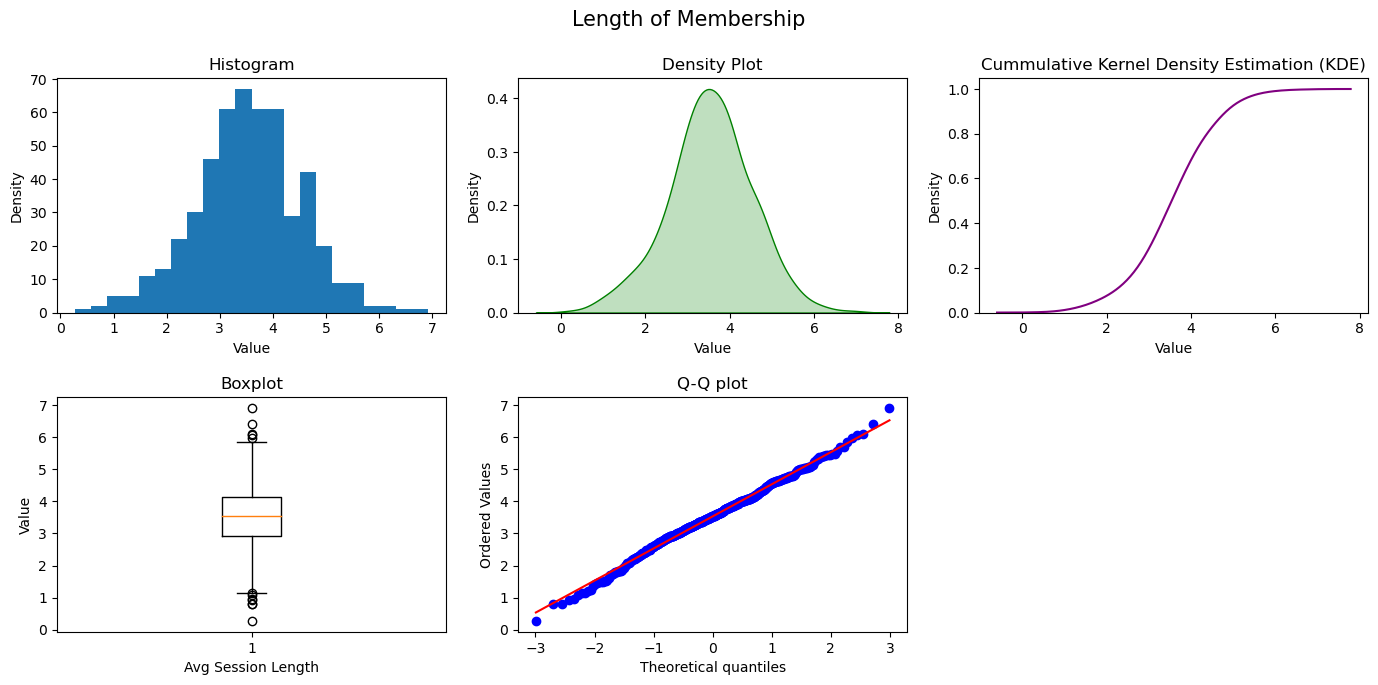

In [8]:
univariate_analysis(data.iloc[:,6])

**2.4.1.Inference on Length of Membership**
 
From the above plots/axes, we infer the following:

    1.it follows normal distribution (ref. histogram plot, density plot, Cummulative kde and Qunatile-Quantile plot)
                
    2.The distribution had postive kurtosis(0.33) (ref. Histogram and density plot)
                
    3.By taking account of mean and median value and comparing it with Cummulative Kde, we confirms normal distribution
    (ref. Cumulative kde)
                
    4.There are more outlier on both tails(ref. histogram and boxplot)

**2.5.Yearly Amount Spent** 

 Statistical Info:
count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64
median:  498.88787546911493
Bins:  22
Skewness:  0.016135312393536154
Kurtosis:  0.44737270208912516


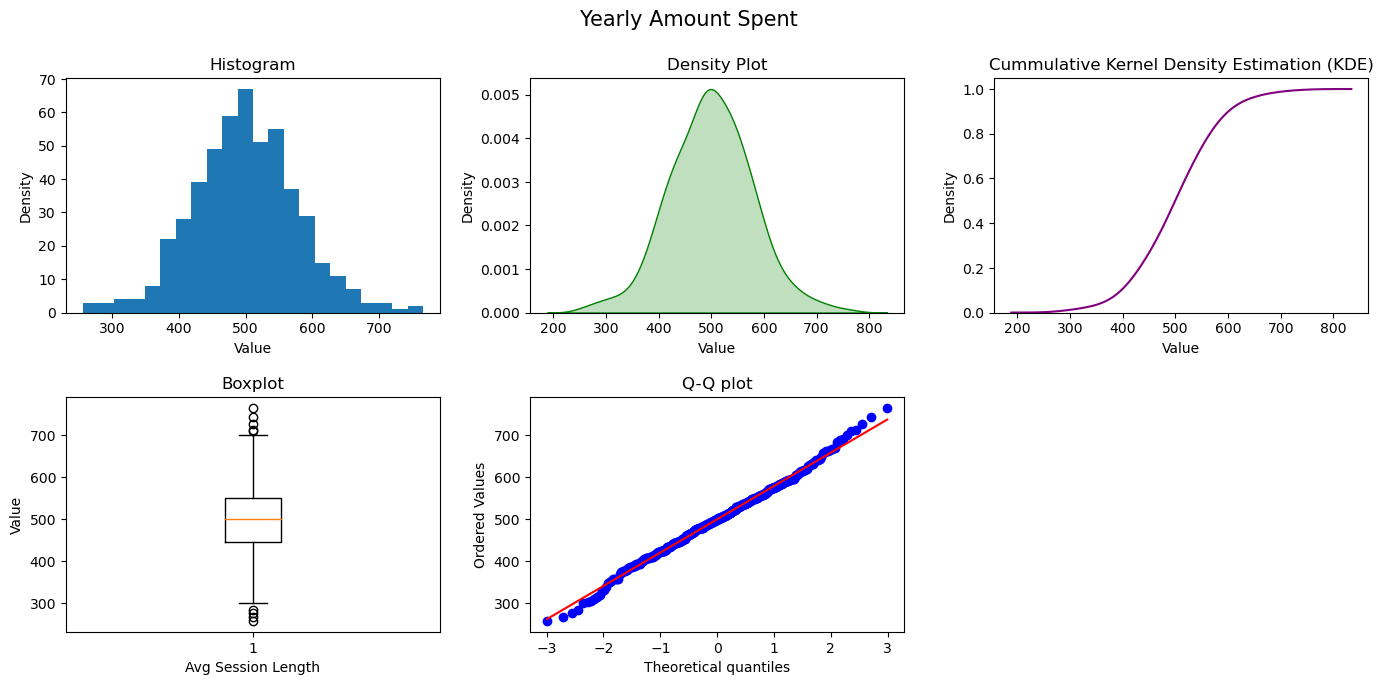

In [9]:
univariate_analysis(data.iloc[:,7])

**2.5.1.Inference on Yearly Amount Spent**
 
From the above plots/axes, we infer the following:

    1.it follows normal distribution (ref. histogram plot, density plot, Cummulative kde and Qunatile-Quantile plot)
                
    2.The distribution has postive kurtosis(0.44) (ref. Histogram and density plot)
                
    3.By taking account of mean and median value and comparing it with Cummulative Kde, we confirms normal distribution
    (ref. Cumulative kde)
                
    4.There are more outlier on both left and right tail(ref. histogram and boxplot)

# 3. Data Preprocessing

## 3.1.Data Cleaning

**3.1.1 Check Duplicates Datapoint**

In [10]:
# using duplicated function
duplicate_rows = data.duplicated()
duplicate_rows.sum()

0

**3.1.2 Removing Unwanted Columnn (ref:1.1 Inference)**

In [11]:
data.drop(columns = ['Address', 'Avatar','Email'], inplace = True)

**3.1.3 Outlier Detection**

In [12]:
def box_plot(data):
    total_column = len(data.columns)
    subplots_per_row = 3
    total_rows = math.ceil(total_column/subplots_per_row)
    # Creating subplots
    fig, ax = plt.subplots(total_rows,subplots_per_row, figsize = (14,7) )

    #flatten helps to convert multi-dimenstional array to single dimension array, so it is easy to loop/iterate
    ax = ax.flatten()
    for i in range(total_column):
        ax[i].boxplot(data.iloc[:,i])
        ax[i].set_title(data.columns[i])

    # removing empty subplots
    for i in range(total_column, subplots_per_row * total_rows):
        fig.delaxes(ax[i])

    plt.tight_layout()    
    plt.show()

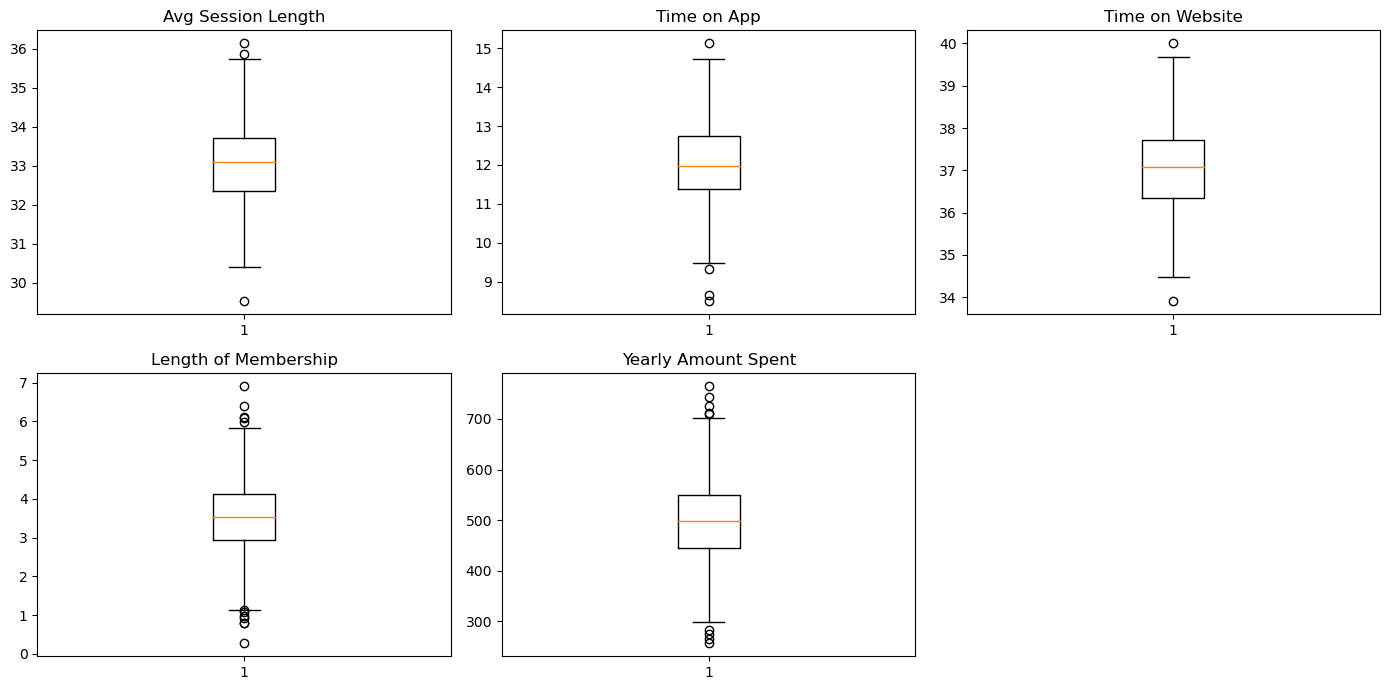

In [13]:
box_plot(data)

**3.1.4. Outlier Handling/Removal**

In [14]:
# Function to handle Outliers using IQR method
def iqr_method(data):
    filtered_data = data.copy()
    for i in range(len(data.columns)):
        # print("\n\nColumn Name:",(data.columns[i]))
        print("\n\nColumn Name: \033[1;34m" + "\033[1m" + data.columns[i] + "\033[0m")

        # Calculate the IQR
        Q1 = data.iloc[:, i].quantile(0.25)
        Q3 = data.iloc[:, i].quantile(0.75)
        IQR = Q3 - Q1

        # Identify and mark outliers using IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(data[(data.iloc[:, i] > upper_bound) | (data.iloc[:, i] < lower_bound)].tail(2))

        # handling outliers with clipping/clapping
        filtered_data.loc[(filtered_data[data.columns[i]] > upper_bound), data.columns[i]] = upper_bound
        filtered_data.loc[(filtered_data[data.columns[i]] < lower_bound), data.columns[i]] = lower_bound

        # Drop rows with outliers
        # outliers = filtered_data[(filtered_data.iloc[:, i] < lower_bound) or (filtered_data.iloc[:, i] > upper_bound)].index   
        # new_data = filtered_data.drop(outliers)

    print("\nShape of new data:",filtered_data.shape)
    return filtered_data

In [15]:
# Function to hande outlier using cook's distance
import numpy as np
import statsmodels.api as sm

def cooks_distance(data):
    # spliting x and y variable
    x =data.iloc[: , 0:(len(data.columns)-1)]
    y =data.iloc[:, (len(data.columns)-1)]
    # Assuming X and y are your feature matrix and target variable
    # Add a constant term to the feature matrix
    X = sm.add_constant(x)

    # Fit your linear regression model
    model = sm.OLS(y, X).fit()

    # Get the Cook's distance for each observation
    influence = model.get_influence()
    cooks_distance = influence.cooks_distance[0]

    # Set the threshold for Cook's distance
    threshold = 4 / len(cooks_distance)

    # Identify potential outliers
    outliers = np.where(cooks_distance > threshold)[0]

    print("Potential outliers:", outliers)
    # Plotting Cook's distance values
    plt.figure(figsize=(14, 7))
    plt.scatter(range(len(cooks_distance)), cooks_distance, color='blue', label='Cook\'s Distance')

    # Highlighting potential outliers
    plt.scatter(outliers, cooks_distance[outliers], color='red', label='Potential Outliers')

    # Adding a horizontal line at the threshold for better visualization
    plt.axhline(y=threshold, color='orange', linestyle='--', label='Cook\'s Distance Threshold')

    plt.title('Cook\'s Distance Plot')
    plt.xlabel('Observation Index')
    plt.ylabel('Cook\'s Distance')
    plt.show()
    
    # returning data without outliers
    return data.drop(index=outliers)

In [16]:
# # Outlier hander - Iqr method
# data = iqr_method(data)

In [17]:
# # Outlier handler - cook's distance
# data = cooks_distance(data)

In [18]:
# # create box plot
# box_plot(data)

## 3.2. Data Transformation

**3.2.1.MinMaxScaler(Normalizatiom)**

In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split

# spliting x and y variable
x =data.iloc[: , 0:4]
y =data.iloc[:, 4]

In [20]:
from sklearn.preprocessing import MinMaxScaler

## Initialize MinMax scaler
scaled_model = MinMaxScaler()

# Fit and transform the data
transformed_data = scaled_model.fit_transform(x)

**3.2.2.Standard Scaler**

In [21]:
# from sklearn.preprocessing import StandardScaler

# # Initialize standard scaler
# scaled_model = StandardScaler()

# # Fit and transform the data
# transformed_data = scaled_model.fit_transform(x)

**3.2.3.Robust Scaler**

In [22]:
# from sklearn.preprocessing import RobustScaler

# # Initialize RobustScaler
# scaler = RobustScaler()

# # Fit and transform the data
# transformed_data = scaler.fit_transform(x)

**3.2.4.Log Transformation**

In [23]:
# transformed_data = np.log(x)

**3.2.5.Box-Cox Transformation**

In [24]:
# from scipy.stats import boxcox
# import numpy as np

# # Transform each feature using Box-Cox transformation
# transformed_features = []
# lambda_values = []

# for feature in data.columns:  # Iterate over each feature
#     # Perform Box-Cox transformation
#     transformed_feature, lambda_value = boxcox(data[feature] + 1)  # Adding 1 to handle non-positive values
#     transformed_features.append(transformed_feature)
#     lambda_values.append(lambda_value)

# # Convert the list of transformed features and lambda values to numpy arrays
# transformed_features = np.array(transformed_features).T
# lambda_values = np.array(lambda_values)

# # Create a DataFrame or use the transformed_features array as needed
# transformed_data = pd.DataFrame(transformed_features, columns=data.columns)

In [25]:
# Convert array to dataframe
data = pd.DataFrame(transformed_data, columns= x.columns)
data1 = pd.DataFrame(y)

In [26]:
# regrouping x and y
data = pd.concat([data,data1],axis = 1)

Potential outliers: [ 16  75  82  96 120 148 166 169 193 197 200 242 244 260 284 286 303 309
 338 340 368 386 396 418 432 460 472 479 493]


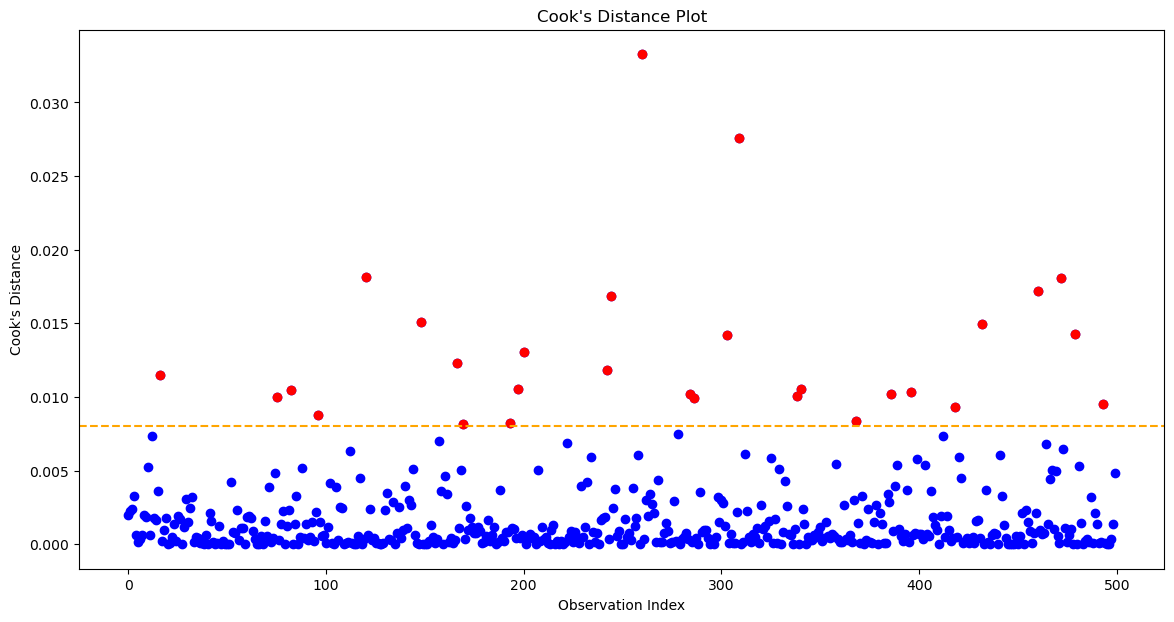

In [27]:
data = cooks_distance(data)

# 4. Exploratory Data Analysis (EDA)

**Reason to go through univariate analysis (eda) again to check, how the preprocessing affect the data**


**4.1 Univariate Analysis**

 Statistical Info:
count    471.000000
mean       0.532872
std        0.146522
min        0.000000
25%        0.430904
50%        0.536728
75%        0.630947
max        1.000000
Name: Avg Session Length, dtype: float64
median:  0.5367281534618797
Bins:  21
Skewness:  -0.07902782558375461
Kurtosis:  0.10715916657714564


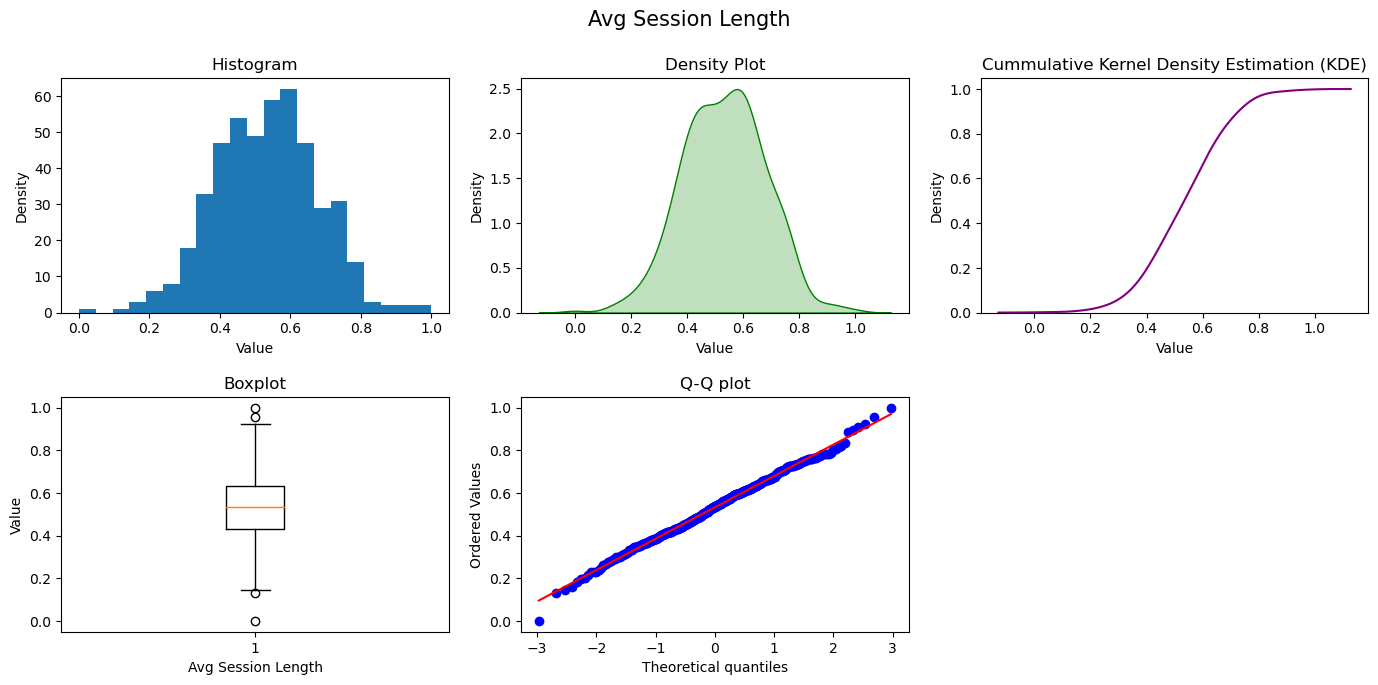

In [28]:
univariate_analysis(data.iloc[:,0])

 Statistical Info:
count    471.000000
mean       0.532227
std        0.146440
min        0.024203
25%        0.433123
50%        0.522422
75%        0.636640
max        1.000000
Name: Time on App, dtype: float64
median:  0.5224219027817338
Bins:  21
Skewness:  0.2010859721134503
Kurtosis:  -0.06448042168717683


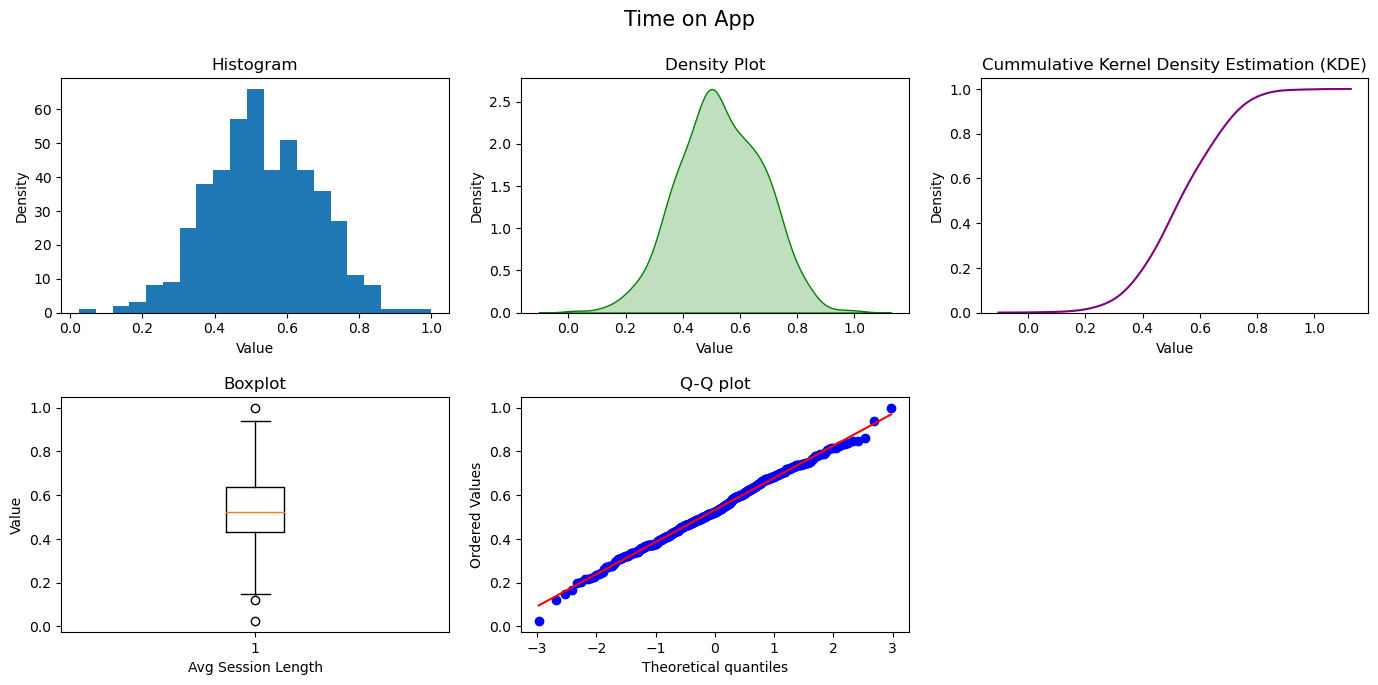

In [29]:
univariate_analysis(data.iloc[:,1])

 Statistical Info:
count    471.000000
mean       0.516616
std        0.162999
min        0.000000
25%        0.402161
50%        0.518732
75%        0.621959
max        1.000000
Name: Time on Website, dtype: float64
median:  0.5187318117898787
Bins:  21
Skewness:  -0.03898141599908218
Kurtosis:  -0.007722654671320495


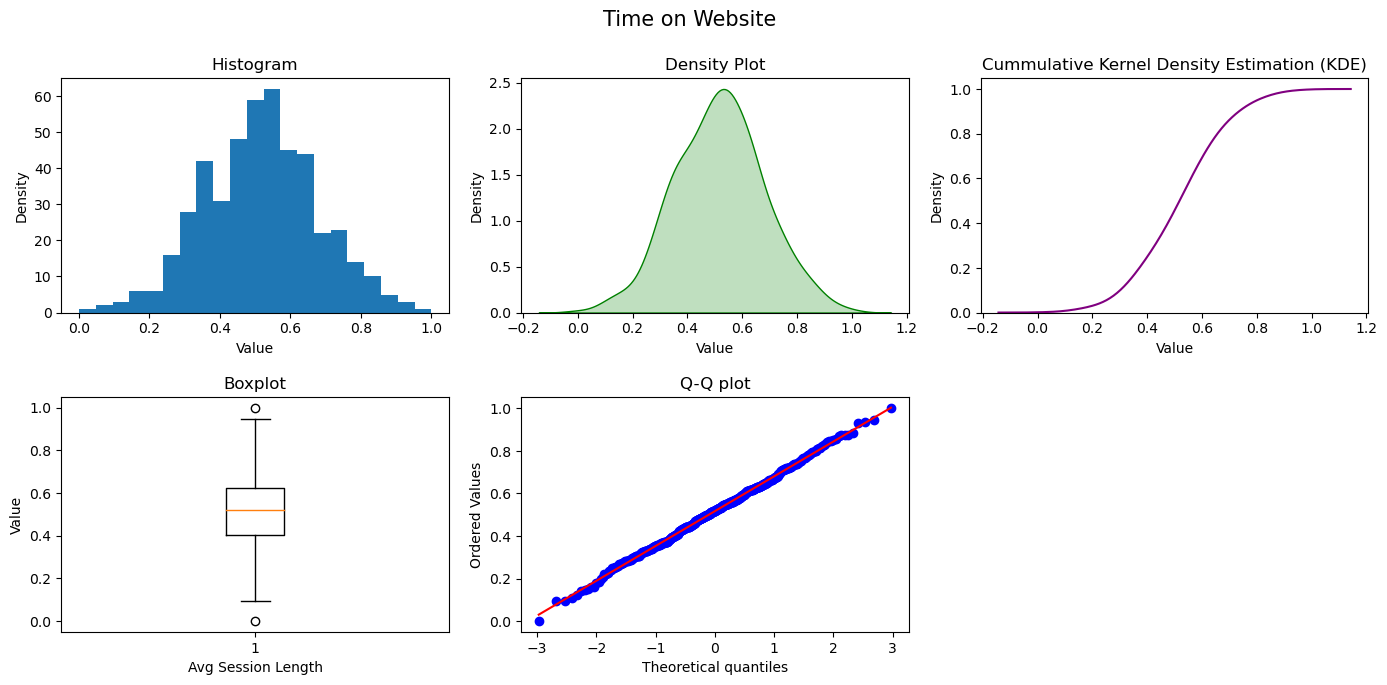

In [30]:
univariate_analysis(data.iloc[:,2])

 Statistical Info:
count    471.000000
mean       0.490473
std        0.147787
min        0.000000
25%        0.400388
50%        0.490465
75%        0.578789
max        1.000000
Name: Length of Membership, dtype: float64
median:  0.4904651056644185
Bins:  21
Skewness:  0.000168006082016682
Kurtosis:  0.40550769903226813


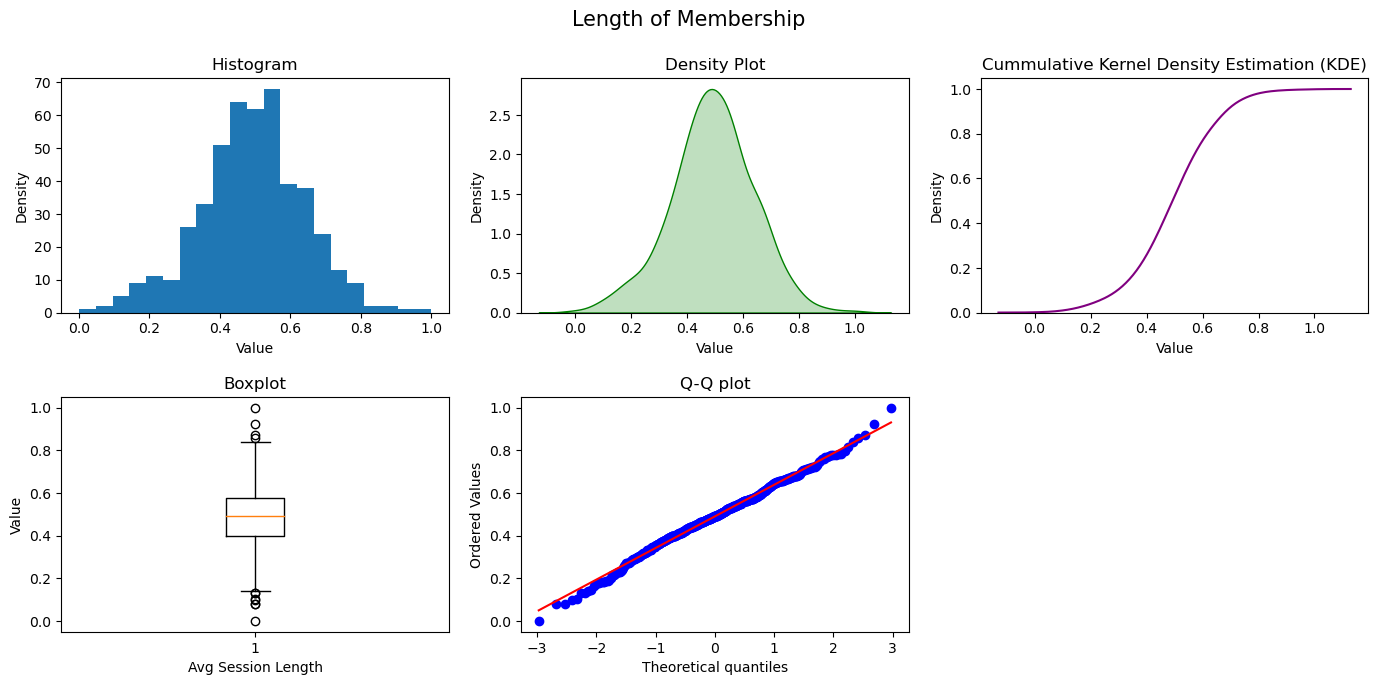

In [31]:
univariate_analysis(data.iloc[:,3])

 Statistical Info:
count    471.000000
mean     498.255303
std       77.283420
min      256.670582
25%      444.579155
50%      497.778642
75%      547.995154
max      765.518462
Name: Yearly Amount Spent, dtype: float64
median:  497.7786422156802
Bins:  21
Skewness:  0.018522767170850336
Kurtosis:  0.4751360573684882


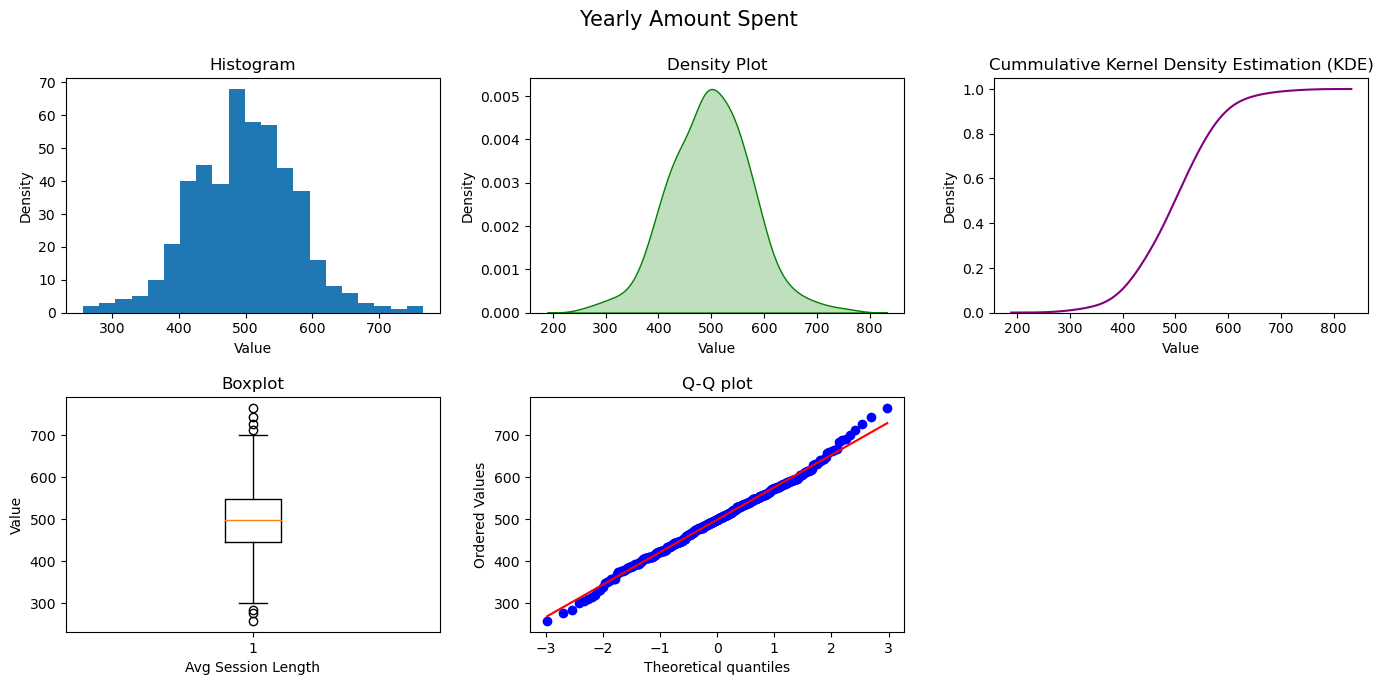

In [32]:
univariate_analysis(data.iloc[:,4])

**4.2.Bivariate Analysis**

C:\Users\gokul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


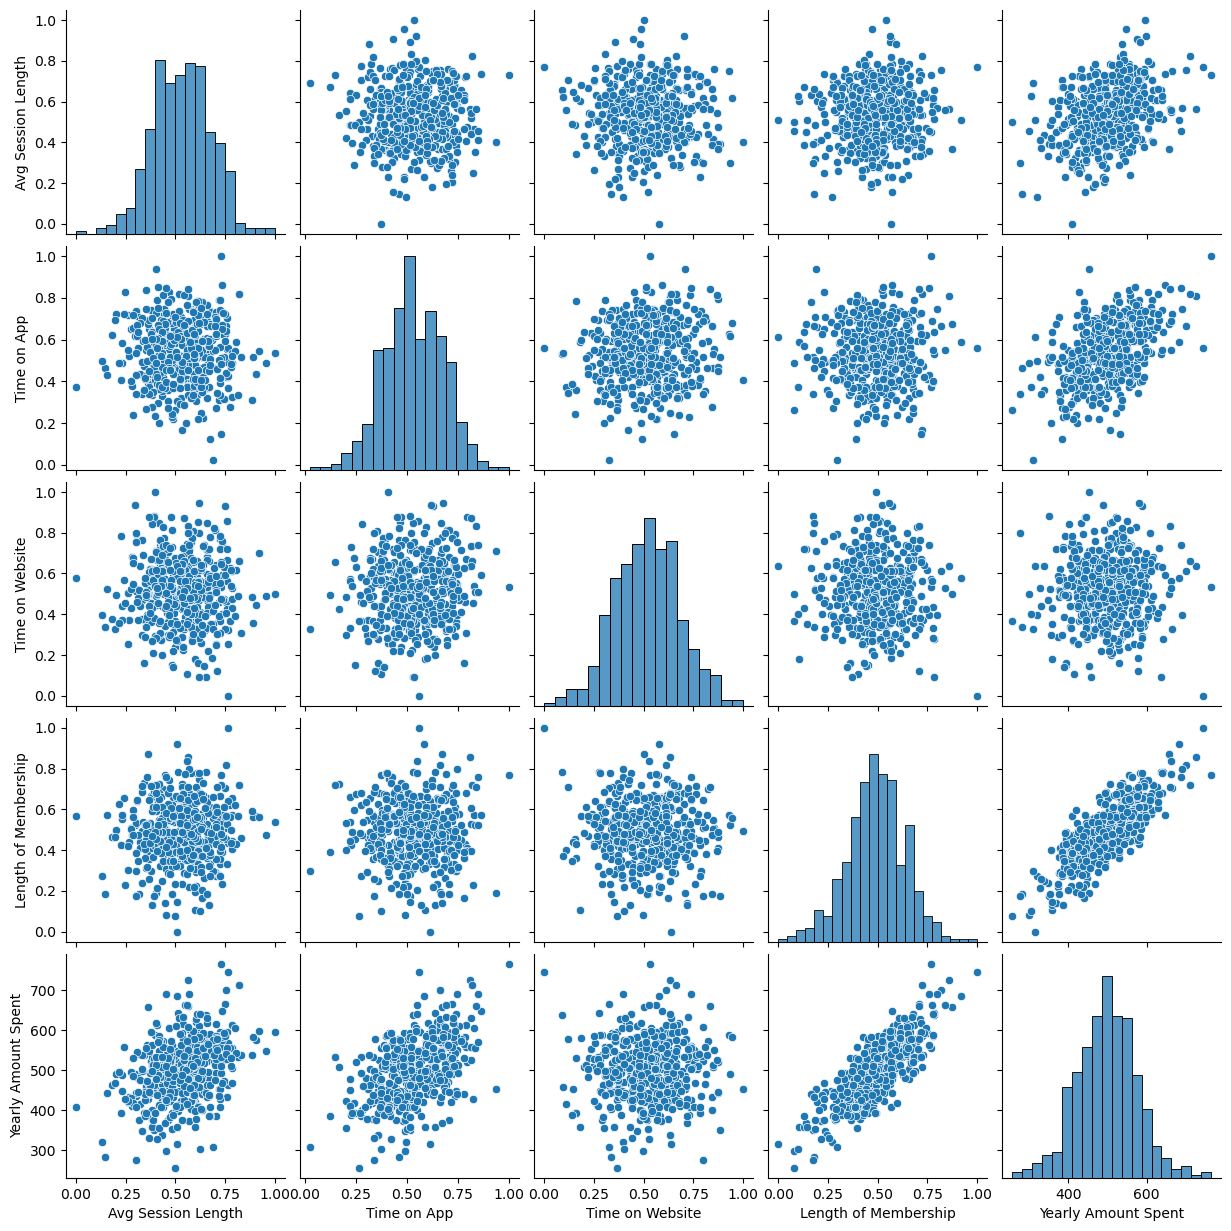

In [33]:
sns.pairplot(data)

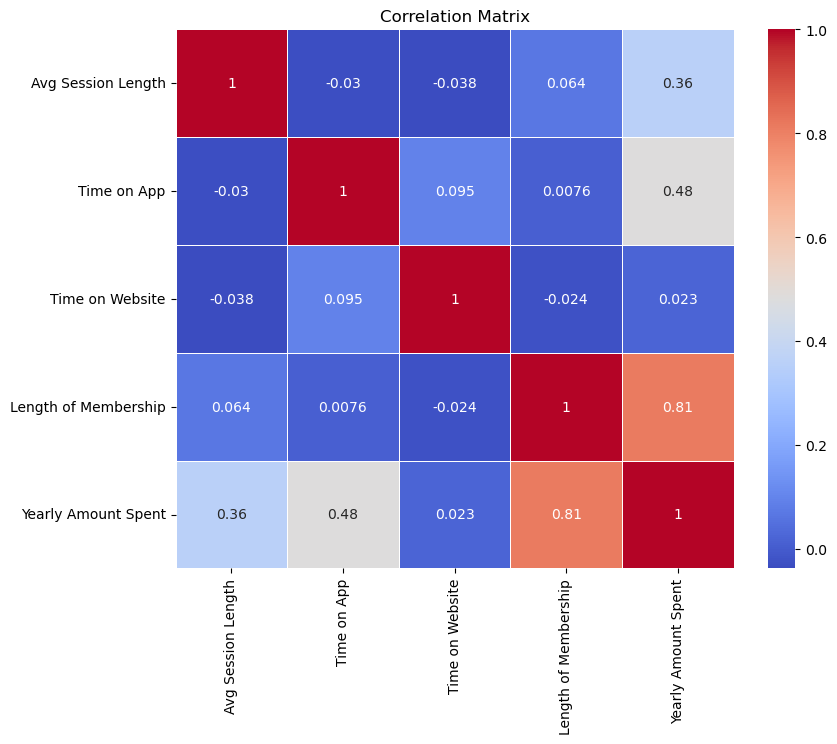

In [34]:
# Correlation Plot
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**4.2.1.Inference**

        1.Top 2 features which has dependence on Target Varible are
                        ->Lenght of Membership (around 81 % correlation)
                        ->Time on App (around 48 % correlation)
                        
        2.Features are independent on each other(ref above plots)

# 5. Model Development/ Building & Evaluation

In [35]:
# Train Test Split
from sklearn.model_selection import train_test_split

# spliting x and y variable
x =data.iloc[: , 0:(len(data.columns)-1)]
y =data.iloc[:,(len(data.columns)-1)]

# splitting train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=42)

In [36]:
#list that contain train and testing accuracy
test_accuracy = []
test_mse = []
train_accuracy = []
train_mse = []

**5.1.Linear Regression**

In [37]:
# Required Modules for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# #Creating Linear Model
# X = sm.add_constant(x_train)
# Z = sm.add_constant(x_test)

# linear_model = sm.OLS(y_train, X).fit()

linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

#train and test predictions
y_train_pred = linear_model.predict(x_train)
y_test_pred = linear_model.predict(x_test)

**5.1.1.Model Evaluation**

In [38]:
def model_evaluation(y_train_pred, y_test_pred):   
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    test_mse.append(mse_test)
    test_accuracy.append(r2_test)
    train_mse.append(mse_train)
    train_accuracy.append(r2_train)

    # Training Data Performance
    print("Training Set Performance:")
    print('-------------------------')
    print("Mean Squared Error:", mse_train)
    print("R-squared Score:", r2_train)

    # Testing data Performance
    print("\nTest Set Performance:")
    print('-----------------------')
    print("Mean Squared Error:", mse_test)
    print("R-squared Score:", r2_test)

In [39]:
model_evaluation(y_train_pred, y_test_pred)

Training Set Performance:
-------------------------
Mean Squared Error: 66.74757101678598
R-squared Score: 0.9893003388377353

Test Set Performance:
-----------------------
Mean Squared Error: 83.58232317226685
R-squared Score: 0.9856310966245265


**5.1.2.Cross Validation**

In [40]:
# using k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LinearRegression()
# 5- fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kfold)
print("5-Fold Cross-Validation Scores:", scores)
sum = 0
for i in list(scores):
    sum = i + sum
cross_validation_score = sum/len(list(scores))
print("Cross_validation_score :",cross_validation_score)

5-Fold Cross-Validation Scores: [0.97935554 0.98896087 0.9885015  0.98884202 0.98665904]
Cross_validation_score : 0.9864637961942831


**5.2.Ridge Regression**

In [41]:
from sklearn.linear_model import Ridge

# Model Creation
ridge_model = Ridge(alpha = 1.0)

#model training using train data
ridge_model.fit(x_train,y_train)

# test prediction and traning prediction
y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)

**5.2.1. Model Evaluation**

In [42]:
model_evaluation(y_train_pred, y_test_pred)

Training Set Performance:
-------------------------
Mean Squared Error: 395.44778665057584
R-squared Score: 0.9366095685569646

Test Set Performance:
-----------------------
Mean Squared Error: 412.31053481220135
R-squared Score: 0.9291183828045105


**5.2.2.Cross Validation**

In [43]:
# 5- fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(ridge_model, x, y, cv=kfold)
print("5-Fold Cross-Validation Scores:", scores)
sum = 0
for i in list(scores):
    sum = i + sum
cross_validation_score = sum/len(list(scores))
print("Cross_validation_score :",cross_validation_score)

5-Fold Cross-Validation Scores: [0.963846   0.97701914 0.97810129 0.97847427 0.97733594]
Cross_validation_score : 0.9749553291978019


**5.3.Decision Tree**

In [44]:
from sklearn.tree import DecisionTreeRegressor

#building model
dt_model = DecisionTreeRegressor(random_state=42)

# training the model
dt_model.fit(x_train, y_train)

# test prediction and training prediction
y_train_pred = dt_model.predict(x_train)
y_test_pred = dt_model.predict(x_test)

**5.3.1.Model Evaluation**

In [45]:
model_evaluation(y_train_pred, y_test_pred)

Training Set Performance:
-------------------------
Mean Squared Error: 0.0
R-squared Score: 1.0

Test Set Performance:
-----------------------
Mean Squared Error: 1116.4177513426457
R-squared Score: 0.808073068720007


**5.3.2.Cross Validation**

In [46]:
# 5-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt_model, x, y, cv=kfold)
print("5-Fold Cross-Validation Scores:", scores)
sum = 0
for i in list(scores):
    sum = i + sum
cross_validation_score = sum/len(list(scores))
print("Cross_validation_score :",cross_validation_score)

5-Fold Cross-Validation Scores: [0.81130545 0.87186147 0.86250793 0.90253175 0.84009687]
Cross_validation_score : 0.8576606936470075


**5.4.Random Forest**

In [47]:
from sklearn.ensemble import RandomForestRegressor

# model creation
rf_model = RandomForestRegressor(n_estimators = 100, max_samples=0.8, max_features=4, random_state = 42)

# model training
rf_model.fit(x_train,y_train)

# test prediction and traning prediction
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

**5.4.1.Model Evaluation**

In [48]:
model_evaluation(y_train_pred, y_test_pred)

Training Set Performance:
-------------------------
Mean Squared Error: 142.031844529459
R-squared Score: 0.9772322410004329

Test Set Performance:
-----------------------
Mean Squared Error: 598.3176921002539
R-squared Score: 0.897141299986294


**5.4.2.Cross Validation***

In [49]:
# 5 -fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, x, y, cv=kfold)
print("5-Fold Cross-Validation Scores:", scores)
sum = 0
for i in list(scores):
    sum = i + sum
cross_validation_score = sum/len(list(scores))
print("Cross_validation_score :",cross_validation_score)

5-Fold Cross-Validation Scores: [0.93588792 0.94578542 0.93323385 0.94393015 0.95154245]
Cross_validation_score : 0.942075957307219


**5.5.Gradient Boosting Regressor**

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

# model creation
gb_model = GradientBoostingRegressor(random_state=42)

# model training
gb_model.fit(x_train, y_train)

# test prediction and traning prediction
y_train_pred = gb_model.predict(x_train)
y_test_pred = gb_model.predict(x_test)

**5.5.1.Model Evaluation**

In [51]:
model_evaluation(y_train_pred, y_test_pred)

Training Set Performance:
-------------------------
Mean Squared Error: 13.613912859029472
R-squared Score: 0.9978176845619209

Test Set Performance:
-----------------------
Mean Squared Error: 419.25074014632554
R-squared Score: 0.9279252700018615


**5.5.2.Cross Validation**

In [52]:
# 5-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gb_model, x, y, cv=kfold)
print("K-Fold Cross-Validation Scores:", scores)
sum = 0
for i in list(scores):
    sum = i + sum
cross_validation_score = sum/len(list(scores))
print("Cross_validation_score :",cross_validation_score)

K-Fold Cross-Validation Scores: [0.95392007 0.96815641 0.96358134 0.97104589 0.9712036 ]
Cross_validation_score : 0.9655814616952327


**5.6.K-Nearest Neighbour**

In [53]:
from sklearn.neighbors import KNeighborsRegressor

# Creating the model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (K) here
 
# training the model
knn_model.fit(x_train, y_train)

# test prediction and traning prediction
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

**5.6.1.Model Evaluation**

In [54]:
model_evaluation(y_train_pred, y_test_pred)

Training Set Performance:
-------------------------
Mean Squared Error: 687.1145051749215
R-squared Score: 0.8898552820266681

Test Set Performance:
-----------------------
Mean Squared Error: 819.0559530324202
R-squared Score: 0.8591934825265279


**5.6.2.Cross Validation**

In [55]:
# 5-fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, x, y, cv=kfold)
print("5-Fold Cross-Validation Scores:", scores)
sum = 0
for i in list(scores):
    sum = i + sum
cross_validation_score = sum/len(list(scores))
print("Cross_validation_score :",cross_validation_score)

5-Fold Cross-Validation Scores: [0.90796836 0.91991107 0.87061836 0.91382052 0.89132931]
Cross_validation_score : 0.900729523977696


**5.7.Support Vector Machine(SVM)**

In [56]:
from sklearn.svm import SVR

# Model Creation
svm_model = SVR(kernel='linear', C = 1.0)

# Model Training
svm_model.fit(x_train,y_train)

# test prediction and traning prediction
y_train_pred = svm_model.predict(x_train)
y_test_pred = svm_model.predict(x_test)

**5.7.1.Model Evaluation**

In [57]:
model_evaluation(y_train_pred, y_test_pred)

Training Set Performance:
-------------------------
Mean Squared Error: 5837.215301199352
R-squared Score: 0.06429215471656313

Test Set Performance:
-----------------------
Mean Squared Error: 5528.7108728946005
R-squared Score: 0.04954170560897675


**5.7.2.Cross Validation**

In [58]:
# 5- fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm_model, x, y, cv=kfold)
print("5-Fold Cross-Validation Scores:", scores)
sum = 0
for i in list(scores):
    sum = i + sum
cross_validation_score = sum/len(list(scores))
print("Cross_validation_score :",cross_validation_score)

5-Fold Cross-Validation Scores: [0.16123942 0.15790644 0.13480822 0.1584614  0.1583862 ]
Cross_validation_score : 0.15416033503447707


# 6.Summary of Model Evaluation

In [59]:
def plot_data(mse,r2_score, model):
    # creating subplots
    fig, axes = plt.subplots(1, 2, figsize = (15,8))
    
    #turning muldimensional handling to sibngle dimension
    ax = axes.flatten()
    
    # background style
    plt.style.use('seaborn-darkgrid')
    
    
    #plot 1
    ax[0].bar(model,mse,color="blue")
    ax[0].plot(model,mse,color="black")
    ax[0].set_title('Mean Squared Error',size =25)
    ax[0].set_xlabel("Models",size=20)
    ax[0].set_ylabel("Accuracy",size=20)
    ax[0].tick_params(axis = 'x', rotation =90 )
    
    #plot 2
    ax[1].bar(model, r2_score,color="blue")
    ax[1].plot(model, r2_score,color="black")
    ax[1].set_title('r2_score',size =25)
    ax[1].set_xlabel("Models",size=20)
    ax[1].set_ylabel("Accuracy",size=20)
    ax[1].tick_params(axis = 'x', rotation = 90)

    fig.tight_layout()
    plt.show()

**6.1,Train Data**

In [60]:
models = ['Linear' , 'Ridge' ,'Decision Tree', 'Random forest', 'Gradient Boosting', 'KNN', 'SVM']

C:\Users\gokul\AppData\Local\Temp\ipykernel_12292\2786520317.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


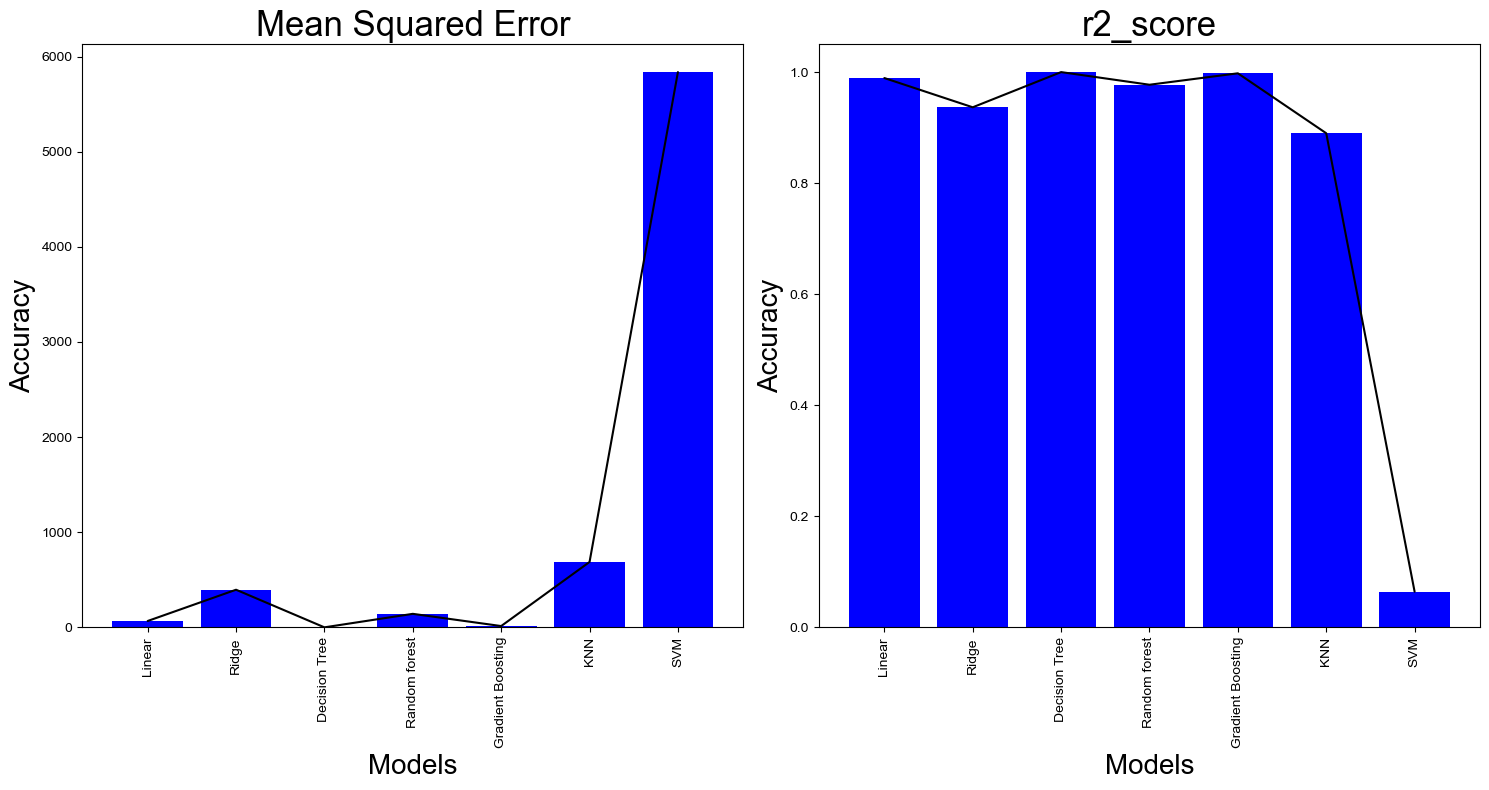

In [61]:
plot_data(train_mse, train_accuracy,models)

**6.2.Test Data**

C:\Users\gokul\AppData\Local\Temp\ipykernel_12292\2786520317.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


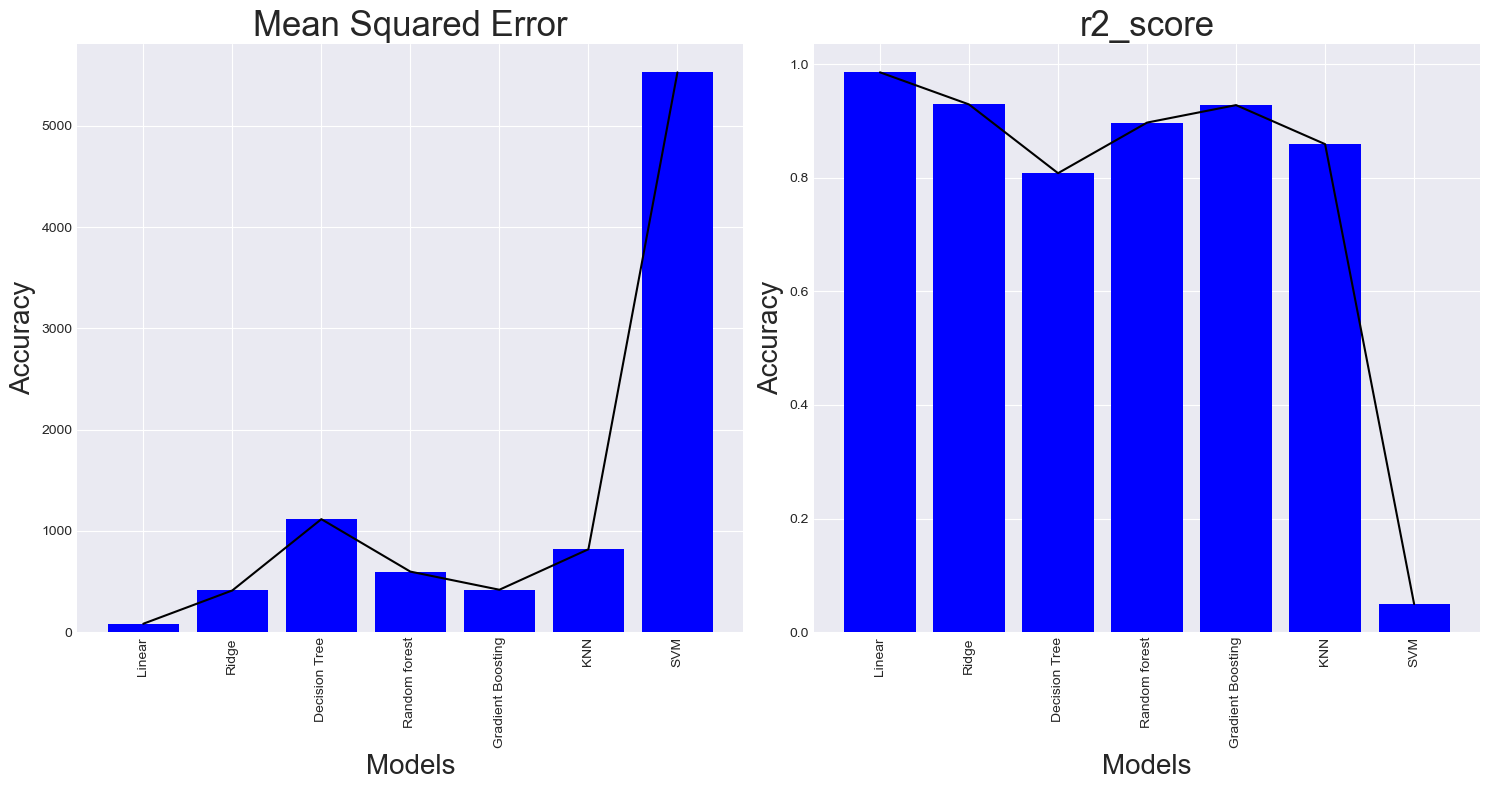

In [62]:
plot_data(test_mse, test_accuracy,models)

**6.3.Summary of MSE and Accuracy**

In [63]:
#above mse and r squared confirms linear regression is better model because of low mse and high r squared

models = ['Linear Regression' , 'Ridge Regression' ,'Decision Tree', 'Random forest', 'Gradient Boosting', 'K Nearest Neighbor', 'Support Vector Machine']
# Constructing data as a list of lists
data_list = [train_mse, train_accuracy, test_mse, test_accuracy]

summary = pd.DataFrame(data_list).T  # Transpose the DataFrame to align columns correctly
summary.columns = ['Mean Squared Error(Train)', 'Accuracy(Train)','Mean Squared Error(Test)', 'Accuracy(Test)']

# Resetting the index and starting from one
summary.reset_index(drop=True, inplace=True)
summary.index = models

summary

,Mean Squared Error(Train),Accuracy(Train),Mean Squared Error(Test),Accuracy(Test)
Linear Regression,66.747571,0.989300,83.582323,0.985631
Ridge Regression,395.447787,0.936610,412.310535,0.929118
Decision Tree,0.000000,1.000000,1116.417751,0.808073
Random forest,142.031845,0.977232,598.317692,0.897141
Gradient Boosting,13.613913,0.997818,419.250740,0.927925
K Nearest Neighbor,687.114505,0.889855,819.055953,0.859193
Support Vector Machine,5837.215301,0.064292,5528.710873,0.049542


In [64]:
# selecting best model based on test accuracy
summary[summary['Accuracy(Test)'] == max(summary['Accuracy(Test)']) ]

,Mean Squared Error(Train),Accuracy(Train),Mean Squared Error(Test),Accuracy(Test)
Linear Regression,66.747571,0.9893,83.582323,0.985631


In [65]:
summary[summary['Mean Squared Error(Test)'] == min(summary['Mean Squared Error(Test)']) ]

,Mean Squared Error(Train),Accuracy(Train),Mean Squared Error(Test),Accuracy(Test)
Linear Regression,66.747571,0.9893,83.582323,0.985631


# 7.Summary of Different Approaches on Dataset

In [66]:
#above mse and r squared confirms linear regression is better model because of low mse and high r squared

dif_app = ['Raw Data',
           'Outlier Treated Data- IQR Method',
           'Outlier Treated Data- Cook\'s Distance',
           'Without Time on website Feature',
          'MinMax Normalization',
          'StandardScaler Scaling',
          'Log Transformation',
          'Box-Cox transformation'] 
model = ['Linear Regression',
         'Linear Regression',
         'Linear Regression',
        'Linear Regression',
        'Linear Regression',
        'Linear Regression',
        'Gradient Boosting',
        'Linear Regression']
r2_score = [0.983429, 0.979537, 0.985631, 0.983562, 0.983429, 0.983429, 0.931785, 0.982965]
mse = [104.162705, 124.545108, 83.582323, 103.326935, 104.162705, 104.162705, 428.790365, 107.077239]

# Constructing data as a list of lists
data_list = [dif_app, model, r2_score, mse]

summary = pd.DataFrame(data_list).T  # Transpose the DataFrame to align columns correctly
summary.columns = ['Approaches', 'Best Model', 'Accuracy(r2_score)', 'MSE']

# Resetting the index and starting from one
summary.reset_index(drop=True, inplace=True)
summary.index += 1

summary

,Approaches,Best Model,Accuracy(r2_score),MSE
1,Raw Data,Linear Regression,0.983429,104.162705
2,Outlier Treated Data- IQR Method,Linear Regression,0.979537,124.545108
3,Outlier Treated Data- Cook's Distance,Linear Regression,0.985631,83.582323
4,Without Time on website Feature,Linear Regression,0.983562,103.326935
5,MinMax Normalization,Linear Regression,0.983429,104.162705
6,StandardScaler Scaling,Linear Regression,0.983429,104.162705
7,Log Transformation,Gradient Boosting,0.931785,428.790365
8,Box-Cox transformation,Linear Regression,0.982965,107.077239


# 8.CONCLUSION

## Main Objectives 🎯

1. **Build Predictive Model**: Develop a robust predictive model capable of forecasting revenue in an ecommerce environment.
2. **Identify Key Dimension**: Determine which dimension contributes more to revenue between time spent on the website ⏳ and time spent on the app 📱, guiding stakeholders on where to focus their optimization efforts.


### 8.1.Selecting Best Predictive  Model

In [67]:
summary

,Approaches,Best Model,Accuracy(r2_score),MSE
1,Raw Data,Linear Regression,0.983429,104.162705
2,Outlier Treated Data- IQR Method,Linear Regression,0.979537,124.545108
3,Outlier Treated Data- Cook's Distance,Linear Regression,0.985631,83.582323
4,Without Time on website Feature,Linear Regression,0.983562,103.326935
5,MinMax Normalization,Linear Regression,0.983429,104.162705
6,StandardScaler Scaling,Linear Regression,0.983429,104.162705
7,Log Transformation,Gradient Boosting,0.931785,428.790365
8,Box-Cox transformation,Linear Regression,0.982965,107.077239


C:\Users\gokul\AppData\Local\Temp\ipykernel_12292\2786520317.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


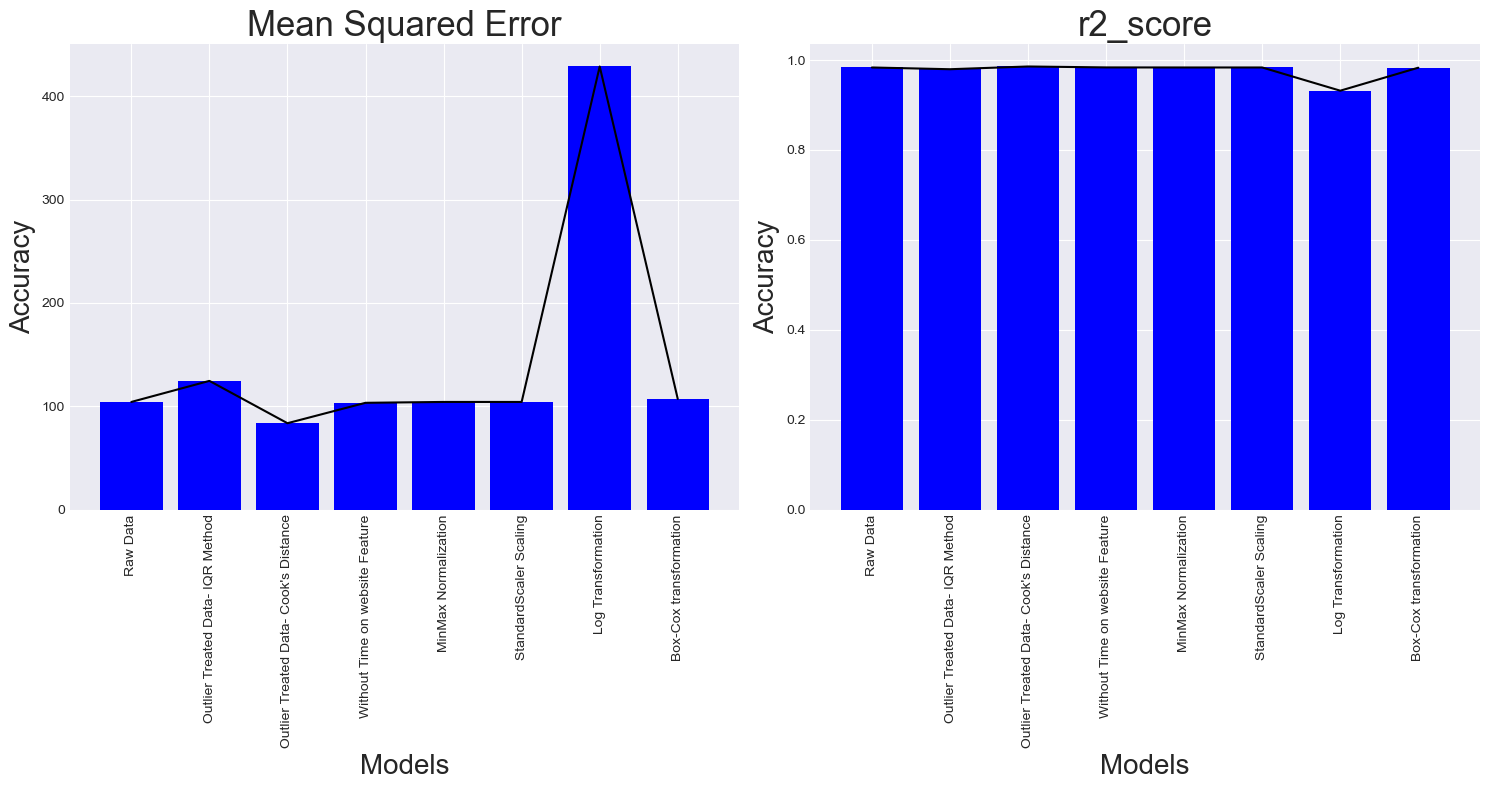

In [68]:
# selecting the approach 
plot_data(mse, r2_score, dif_app)

In [69]:
print('\033[1m BEST MODEL:\033[0m',)
summary[summary ['Accuracy(r2_score)'] == max(summary['Accuracy(r2_score)'])]

 BEST MODEL:


,Approaches,Best Model,Accuracy(r2_score),MSE
3,Outlier Treated Data- Cook's Distance,Linear Regression,0.985631,83.582323


### 8.1.1.Inference

Approach we used to select best Model:

        1. started by using different preprocessing approach on dataset
        
        2. Recorded accuracy of different models of various approaches to find the best model
        
        3. The above summary data frame and plot shows the different approaches which we had tried and the best outcome mode-l of each approaches 
        
        4. Hence we conclude linear regression model of cook's distance outlier is the best model
        
**Best Predictive Model:** Linear Regression

**Approach:** Cook's Distance Outlier Handling

### 8.2.Identifying Key Dimension Between Time on Website vs Time on App

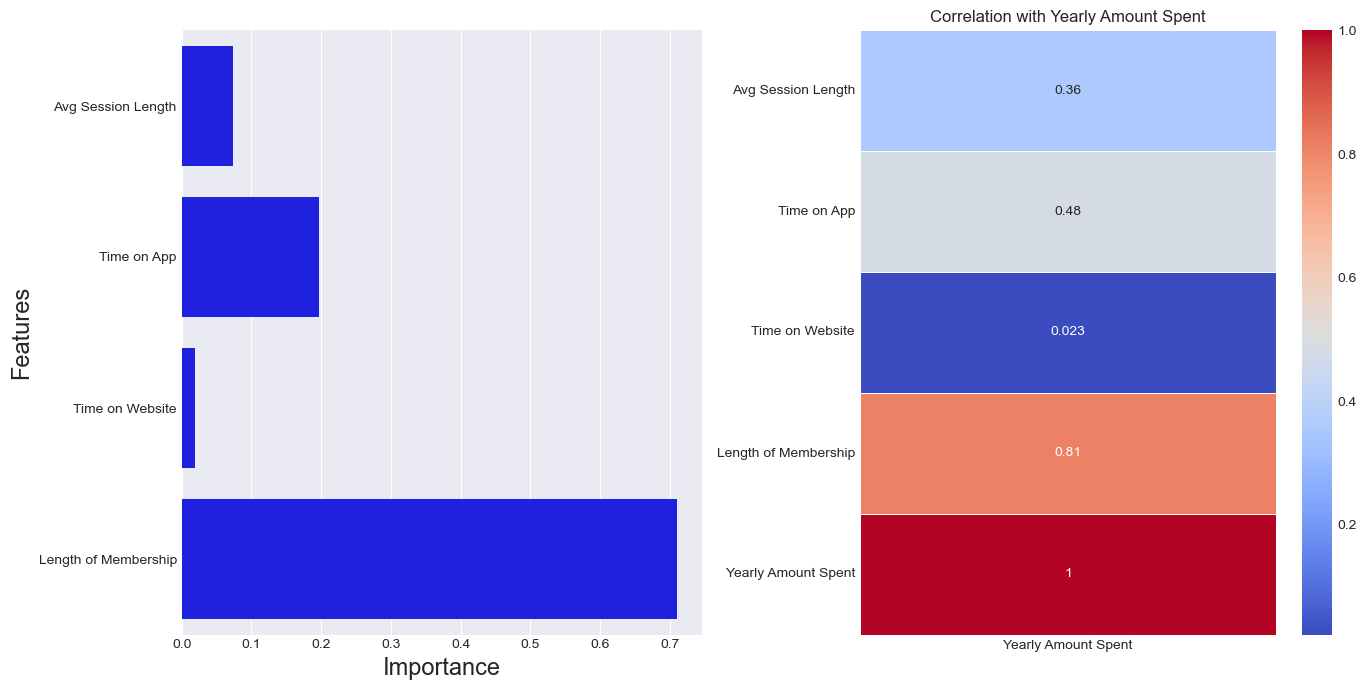

<Figure size 200x500 with 0 Axes>

In [70]:
fig, axes = plt.subplots(1,2, figsize = (14,7))

ax = axes.flatten()

# Feature Importnace
sns.barplot(y = x.columns,x = rf_model.feature_importances_,color='blue', ax = ax[0])
ax[0].set_xlabel('Importance',size = 17)
ax[0].set_ylabel('Features',size = 17)

# Correlation Plot
dependent_variable = 'Yearly Amount Spent'

# correlation matrix
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(2, 5))
sns.heatmap(corr_matrix[[dependent_variable]], annot=True, cmap='coolwarm', linewidths=0.6, ax = ax[1])
ax[1].set_title(f'Correlation with {dependent_variable}')


fig.tight_layout()
plt.show()

## 8.2.1.Inference

Conclusion Based on Above plot:

        1.We use Corellation Matrix and Feature importance plot created with random forest to drive to conclusion
        
        2.Based on this, We conclude that Time on app variable contributed more towards yearly amount spent Variable
        
        3.Hence it is proven, the company should focus more on the mobile app 
        
        
**Key Feature Between Time on App & Time on Website:** Time on App